In [1]:
import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Load dataframe

df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
# Stats of the numerical columns

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Checking the null values in all the columns

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


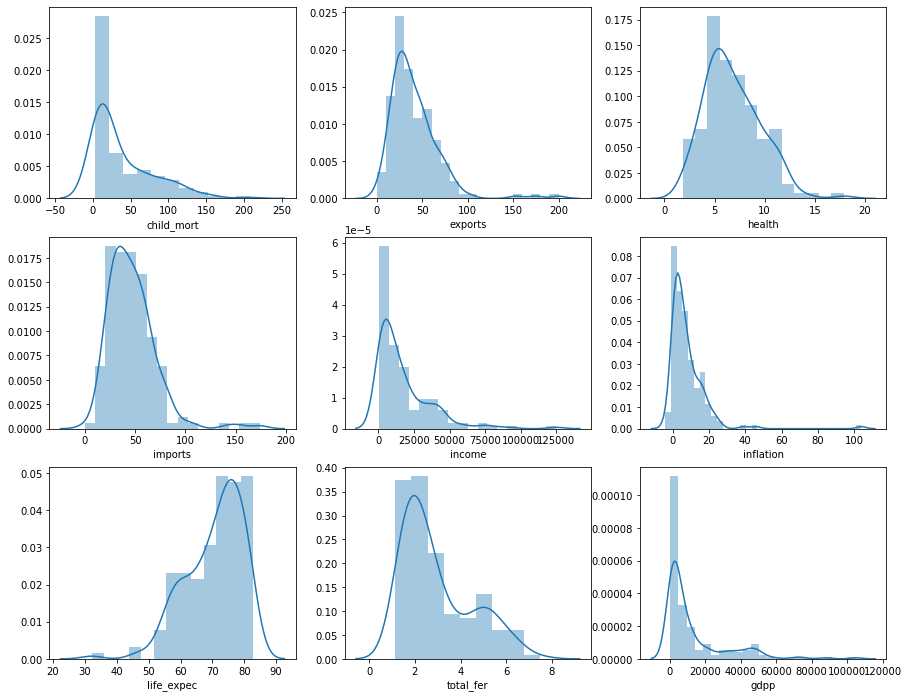

In [7]:
# Checking the distrbution of the numerical variables

plt.figure(figsize=(15,12))
for i in enumerate(df.columns.drop('country')):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])
    

In [8]:
# Converting the export variable to its original value instead of percentage

df.exports = df.exports * df.gdpp / 100

In [9]:
# converting the variables health and imports to orginal values instead of percentage

df.health = df.health * df.gdpp / 100
df.imports = df.imports * df.gdpp / 100

## Outliers treatment

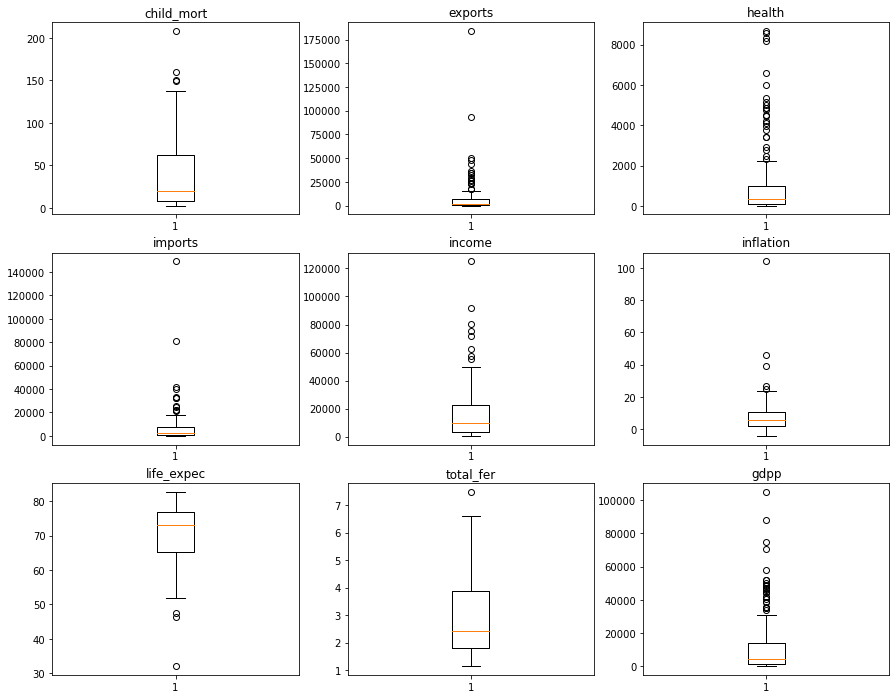

In [10]:
# Checkiing the outliers in the numeric columns

plt.figure(figsize=(15,12))
for i in enumerate(df.columns.drop('country')):
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(df[i[1]])
    plt.title(i[1])
# plt.boxplot(df.income)
# plt.show()

**All the numerical variable seem to have outliers. Lets deal with the variable one by one.**

In [11]:
df.child_mort.quantile([.05,.1,.25,.5,.75,.9,.95,.99,1])

0.05      3.46
0.10      4.20
0.25      8.25
0.50     19.30
0.75     62.10
0.90    100.22
0.95    116.00
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64

**There seems to be no outliers in child_mort variable**

In [12]:
df.exports.quantile([.1,.25,.5,.75,.9,.95,.99,1])

0.10       110.2248
0.25       447.1400
0.50      1777.4400
0.75      7278.0000
0.90     17760.6000
0.95     31385.1000
0.99     64794.2600
1.00    183750.0000
Name: exports, dtype: float64

**We can see a huge leap of difference between the max and the 99th quantile.**

In [13]:
# Capping the values to 99th percentile

q1 = df.exports.quantile(.99)

df.exports[df.exports>=q1] = q1

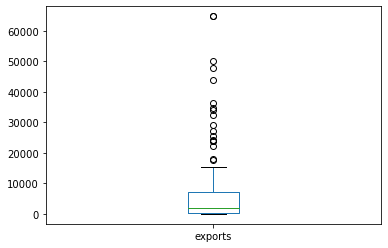

In [14]:
df.exports.plot.box()

In [15]:
df.exports[df.exports>=50000]

73     50161.00
91     64794.26
133    64794.26
Name: exports, dtype: float64

In [16]:
# There are only 3 values greater than 50000. SO capping all the outliers to 50,000

df.exports[df.exports >=50000] = 50000

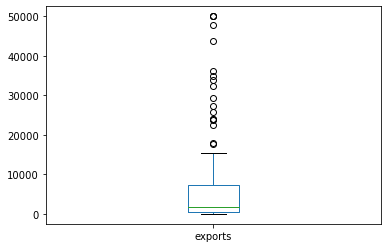

In [17]:
df.exports.plot.box()
plt.show()

In [18]:
df.health.quantile([.1,.25,.5,.75,.90,.95,.99,1])

0.10      36.50256
0.25      78.53550
0.50     321.88600
0.75     976.94000
0.90    3825.41600
0.95    4966.70100
0.99    8410.33040
1.00    8663.60000
Name: health, dtype: float64

In [19]:
# Capping the vaues to 95th percentile of the variable

q = df.health.quantile(.95)

df.health[df.health >= q] = q

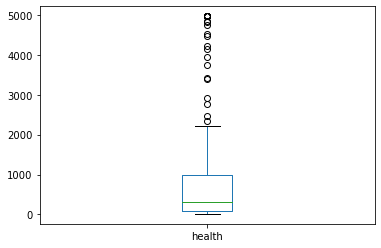

In [20]:
df.health.plot.box()

In [21]:
df.imports.quantile([.1,.25,.5,.75,.90,.95,.98,1])

0.10       211.0056
0.25       640.2150
0.50      2045.5800
0.75      7719.6000
0.90     15034.2800
0.95     24241.5600
0.98     37651.4000
1.00    149100.0000
Name: imports, dtype: float64

In [22]:
# There are only 8 values greater than 30000. Capping all the outliers to 30000.

df.imports[df.imports >=30000] = 30000

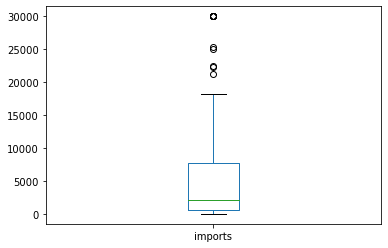

In [23]:
df.imports.plot.box()
plt.show()

In [24]:
df.imports.quantile([.1,.25,.5,.75,.90,.95,.98,1])

0.10      211.0056
0.25      640.2150
0.50     2045.5800
0.75     7719.6000
0.90    15034.2800
0.95    24241.5600
0.98    30000.0000
1.00    30000.0000
Name: imports, dtype: float64

### Income

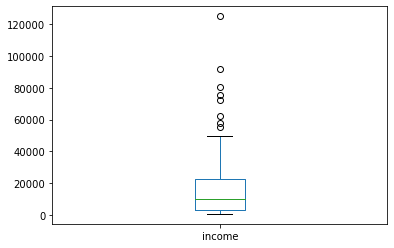

In [25]:
df.income.plot.box()
plt.show()

In [26]:
df.income.quantile([.25,.5,.75,.9,.95,.99,1])

0.25      3355.0
0.50      9960.0
0.75     22800.0
0.90     41220.0
0.95     48290.0
0.99     84374.0
1.00    125000.0
Name: income, dtype: float64

In [27]:
df.income[df.income > 60000]

23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
Name: income, dtype: int64

In [28]:
# Capping all the outliers in income to 60000

df.income[df.income >=60000] = 60000

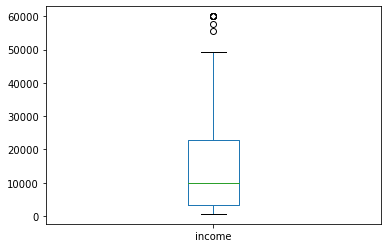

In [29]:
df.income.plot.box()
plt.show()

### gdpp

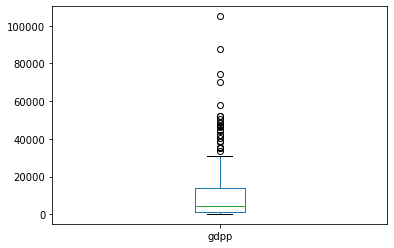

In [30]:
df.gdpp.plot.box()
plt.show()

**Values are tightly packed till 60000. Lets check the values more than 60000 and the quantiles of gdpp**

In [31]:
df.gdpp.quantile([.25,.5,.75,.9,.95,.99,1])

0.25      1330.0
0.50      4660.0
0.75     14050.0
0.90     41840.0
0.95     48610.0
0.99     79088.0
1.00    105000.0
Name: gdpp, dtype: float64

In [32]:
df.gdpp[df.gdpp >=60000]

91     105000
114     87800
123     70300
145     74600
Name: gdpp, dtype: int64

In [33]:
# There are only 4 values greater than 60000. Capping all the outliers in gdpp to 60000

df.gdpp[df.gdpp >=60000] = 60000

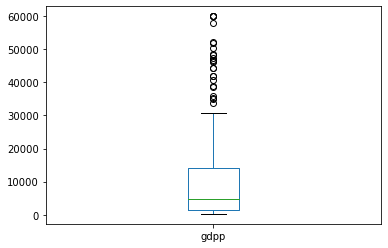

In [34]:
df.gdpp.plot.box()
plt.show()

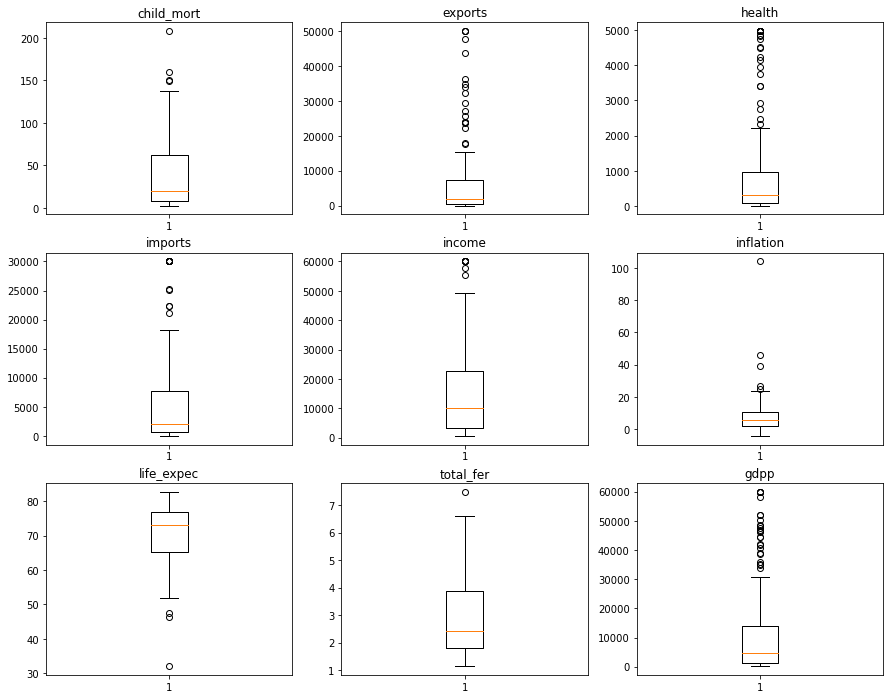

In [36]:
plt.figure(figsize=(15,12))
for i in enumerate(df.columns.drop('country')):
    plt.subplot(3,3,i[0]+1)
    plt.boxplot(df[i[1]])
    plt.title(i[1])

## Hopkins Test: to check the cluster tendency

In [37]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [38]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [39]:
hopkins(df.drop('country', axis=1))

0.9437915778793854

**0.94 is a very goo hopkins score. Anything above .85 is a very good hopkins score and are definitely eligible for clustering. So we cn proceed**

## Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
df1 = scaler.fit_transform(df.drop('country',axis=1))
df1

array([[ 1.29153238, -0.59737079, -0.62943544, ..., -1.61909203,
         1.90288227, -0.73358381],
       [-0.5389489 , -0.4941039 , -0.47348864, ...,  0.64786643,
        -0.85997281, -0.51418094],
       [-0.27283273, -0.44033954, -0.53001667, ...,  0.67042323,
        -0.0384044 , -0.49122955],
       ...,
       [-0.37231541, -0.51324319, -0.59652699, ...,  0.28695762,
        -0.66120626, -0.68662651],
       [ 0.44841668, -0.56537406, -0.61153387, ..., -0.34463279,
         1.14094382, -0.68662651],
       [ 1.11495062, -0.55142702, -0.59901824, ..., -2.09278484,
         1.6246091 , -0.67732189]])

In [43]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [44]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.597371,-0.629435,-0.690211,-0.913978,0.157336,-1.619092,1.902882,-0.733584
1,-0.538949,-0.494104,-0.473489,-0.456821,-0.395092,-0.312347,0.647866,-0.859973,-0.514181
2,-0.272833,-0.440340,-0.530017,-0.535622,-0.209865,0.789274,0.670423,-0.038404,-0.491230
3,2.007808,-0.394239,-0.588935,-0.520336,-0.646428,1.387054,-1.179234,2.128151,-0.548918
4,-0.695634,-0.076659,-0.150685,0.240629,0.176805,-0.601749,0.704258,-0.541946,-0.011111


## Find the correct K value

### Silhouette score

In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

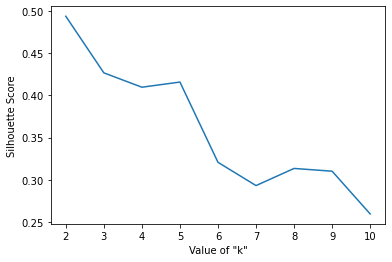

In [46]:
sil =[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(df1)
    sil.append([i,silhouette_score(df1,kmeans.labels_)])
    
sil = pd.DataFrame(sil)

plt.ylabel('Silhouette Score')
plt.xlabel('Value of "k"')
plt.plot(sil[0],sil[1])
plt.show()

In [47]:
sil

,0,1
0,2,0.493444
1,3,0.426505
2,4,0.409513
3,5,0.415610
4,6,0.320710
5,7,0.293180
6,8,0.313454
7,9,0.310192
8,10,0.259672


**Silhouette score is good when the number of clusters is 3,5 and 6. Lets check the ssd elbow curve**

### SSD elbow curve

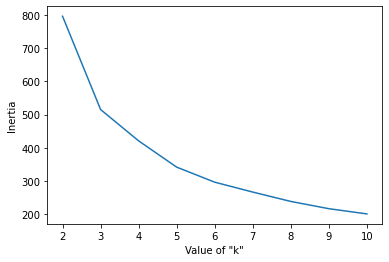

In [48]:
ssd =[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i).fit(df1)
    ssd.append([i,kmeans.inertia_])
    
ssd = pd.DataFrame(ssd)

plt.ylabel('Inertia')
plt.xlabel('Value of "k"')
plt.plot(ssd[0],ssd[1])
plt.show()

**There is a good steep at point 3. So lets try clustering with n value as 3 and try with n value as 5 too**

In [49]:
kmean = KMeans(n_clusters=3, random_state=0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [50]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [95]:
df['Cluster_id'] = kmean.labels_

In [96]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [97]:
df.Cluster_id.value_counts()

1    89
0    48
2    30
Name: Cluster_id, dtype: int64

## Plotting

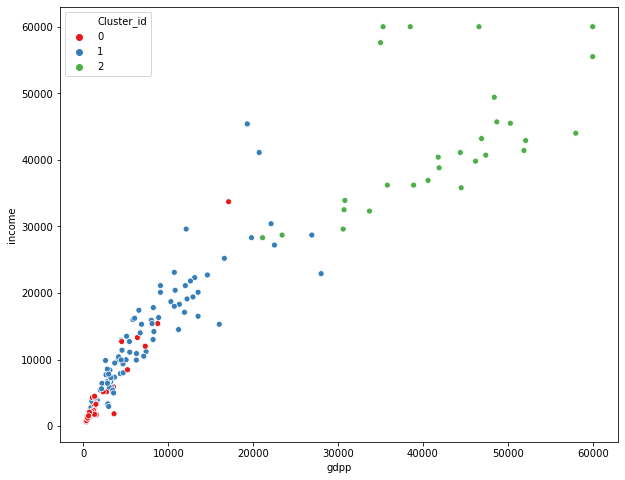

In [54]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.gdpp,y=df.income,hue=df.Cluster_id,palette='Set1')
plt.show()

- Cluster 0 - low gdp low income
- Cluster 1 - Medium gdp and medium income
- Cluster 2 - High Gdp and High income

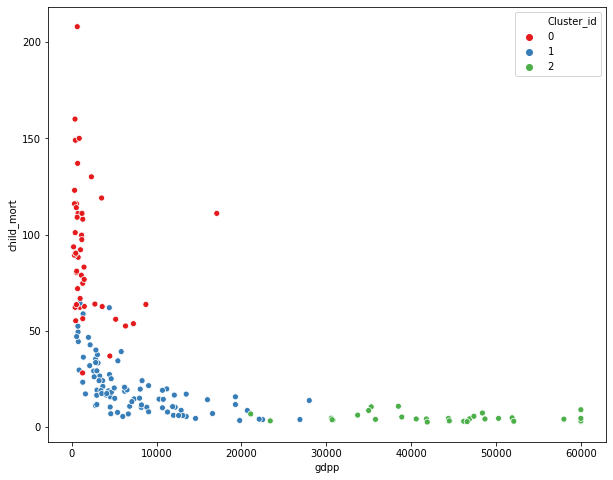

In [55]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.gdpp,y=df.child_mort,hue=df.Cluster_id,palette='Set1')
plt.show()

- Cluster 0 - low gdp high Child_mort
- Cluster 1 - Medium gdp and medium Child_mort
- Cluster 2 - High Gdp and low Child_mort

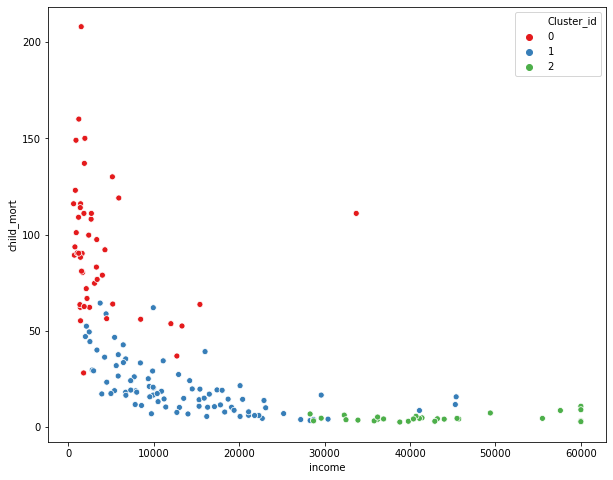

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.income,y=df.child_mort,hue=df.Cluster_id,palette='Set1')
plt.show()

- Cluster 0 - low income high Child_mort
- Cluster 1 - Medium income and medium Child_mort
- Cluster 2 - High income and low Child_mort

## Cluster Profiling

In [57]:
df[['child_mort','income','gdpp','Cluster_id']].groupby(['Cluster_id']).mean()

,child_mort,income,gdpp
Cluster_id,,,
0,91.610417,3897.354167,1909.208333
1,20.726966,13626.853933,7552.494382
2,4.970000,43880.000000,43450.000000


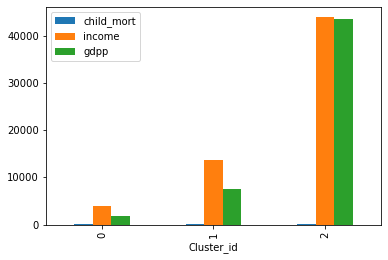

In [58]:
df[['child_mort','income','gdpp','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

**Child_mort is too small to visualise. Lets polt child_mort in a seperate graph**

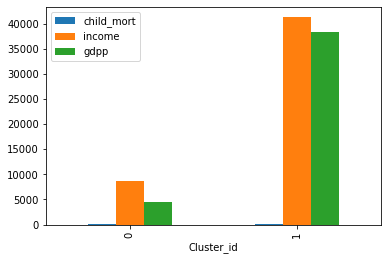

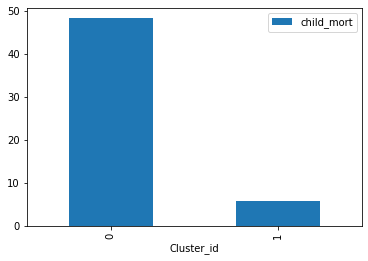

In [86]:
df[['child_mort','income','gdpp','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
df[['child_mort','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

- Countries in cluster 0 are having a very low income and gdp per capita and a very high Child Mortality rate. These countries are the ones that need aid

- Countries in cluster 2 are having very high income and gdp per capita. Child mortality rate is also very low. These can be considered as the most developed countries.

- Countries in cluster 1 are have a decent gdpp and income and the average child_mort is also not too high.

**Lets look at the other attributes too**

In [60]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


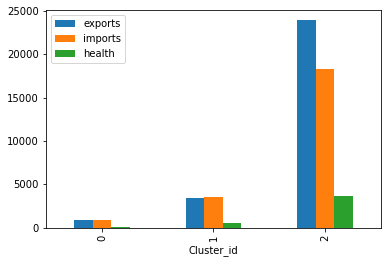

In [61]:
df[['exports','imports','health','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

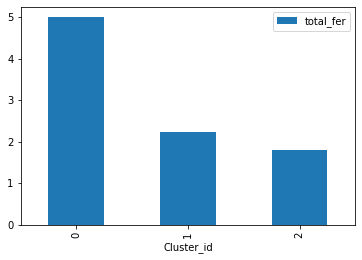

In [62]:
df[['total_fer','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

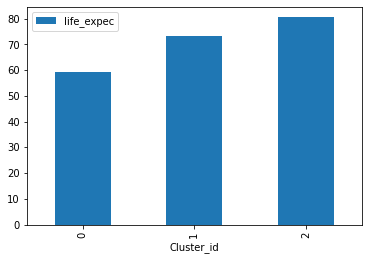

In [63]:
df[['life_expec','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

## Hierarchical Clustering

In [64]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.597371,-0.629435,-0.690211,-0.913978,0.157336,-1.619092,1.902882,-0.733584
1,-0.538949,-0.494104,-0.473489,-0.456821,-0.395092,-0.312347,0.647866,-0.859973,-0.514181
2,-0.272833,-0.440340,-0.530017,-0.535622,-0.209865,0.789274,0.670423,-0.038404,-0.491230
3,2.007808,-0.394239,-0.588935,-0.520336,-0.646428,1.387054,-1.179234,2.128151,-0.548918
4,-0.695634,-0.076659,-0.150685,0.240629,0.176805,-0.601749,0.704258,-0.541946,-0.011111


In [66]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.597371,-0.629435,-0.690211,-0.913978,0.157336,-1.619092,1.902882,-0.733584
1,-0.538949,-0.494104,-0.473489,-0.456821,-0.395092,-0.312347,0.647866,-0.859973,-0.514181
2,-0.272833,-0.440340,-0.530017,-0.535622,-0.209865,0.789274,0.670423,-0.038404,-0.491230
3,2.007808,-0.394239,-0.588935,-0.520336,-0.646428,1.387054,-1.179234,2.128151,-0.548918
4,-0.695634,-0.076659,-0.150685,0.240629,0.176805,-0.601749,0.704258,-0.541946,-0.011111


### Importing libraries

In [67]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

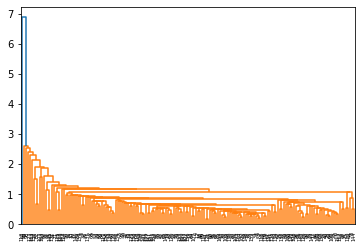

In [68]:
# Single Linkage

mergings = linkage(df1, method='single',metric='euclidean' )
dendrogram(mergings)
plt.show()

In [69]:
clables = cut_tree(mergings,n_clusters=3).reshape(-1,)
clables

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Single linkage clustering is really not useful here, as we can see only 1 country each in cluter 1 and cluster2.**

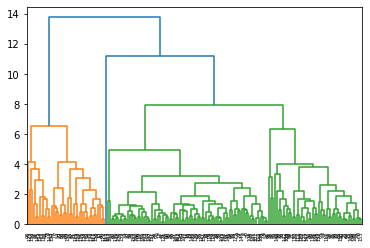

In [70]:
# Complete linkage

mergings = linkage(df1,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [72]:
df2 = df

In [73]:
df2.Cluster_id = cluster_labels
df2.Cluster_id.value_counts()

0    127
1     39
2      1
Name: Cluster_id, dtype: int64

In [74]:
cluster_labels = cut_tree(mergings,n_clusters=2).reshape(-1,)
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [75]:
df2.Cluster_id = cluster_labels
df2.Cluster_id.value_counts()

0    128
1     39
Name: Cluster_id, dtype: int64

**Hierarchical clustering is producing cluster with only one 1 country when the number of clusters is more than 2. So we can continue with only 2 clusters**

**k==2**

## Plotting

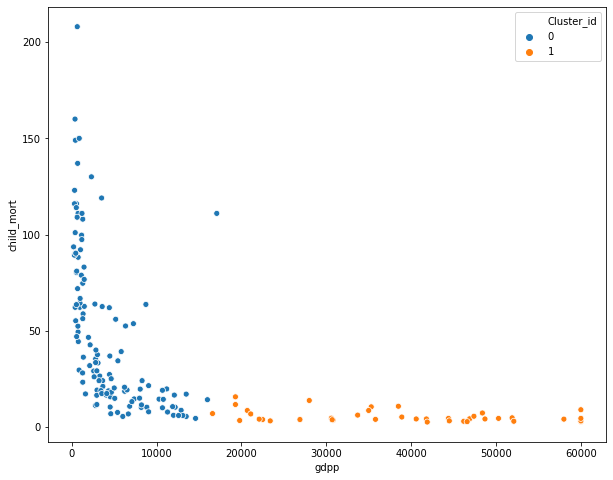

In [76]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='gdpp', y='child_mort', hue = 'Cluster_id', data=df2)
plt.show()

- cluster 0 - low gdpp high child mortality rate
- cluster 1 - high gdp per capita and low chilg mortality rate

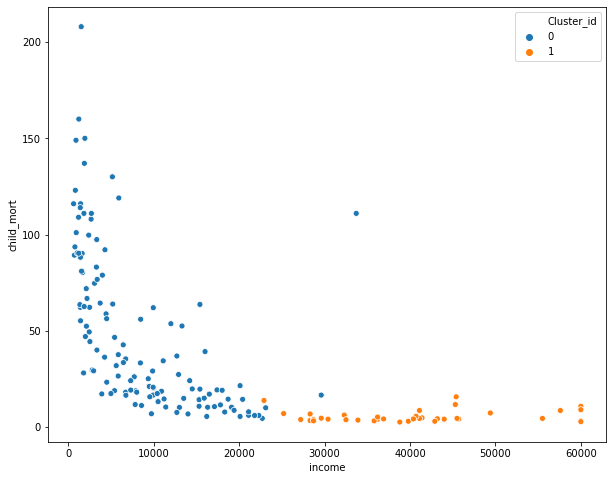

In [77]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='income', y='child_mort', hue = 'Cluster_id', data=df2)
plt.show()

- cluster 0 - low income high child mortality rate
- cluster 1 - high income and low chilg mortality rate

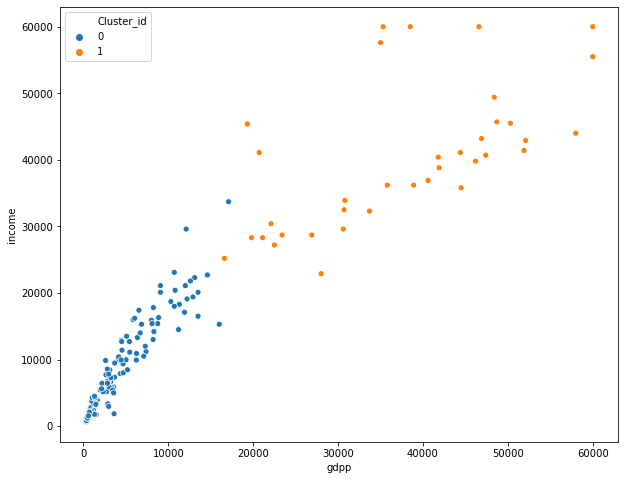

In [78]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='gdpp', y='income', hue = 'Cluster_id', data=df2)
plt.show()

- cluster 0 - low gdpp low income
- cluster 1 - high gdp per capita and high income

### Cluster Profiling

In [79]:
df2[['child_mort','income','gdpp','Cluster_id']].groupby(['Cluster_id']).mean()

,child_mort,income,gdpp
Cluster_id,,,
0,48.202344,8635.648438,4442.296875
1,5.671795,41305.128205,38428.205128


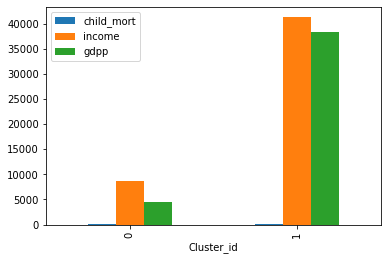

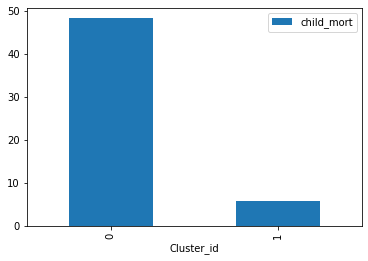

In [80]:
df2[['child_mort','income','gdpp','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
df2[['child_mort','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

- Countries in cluster 0 are having a very low income and gdp per capita and a very high Child Mortality rate. These countries are the ones that need aid

- Countries in cluster 1 are having very high income and gdp per capita. Child mortality rate is also very low. These can be considered as the most developed countries.


**Lets look at the other attributes too**

In [81]:
df2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


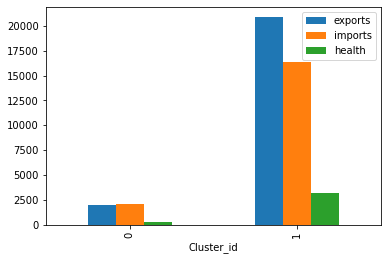

In [82]:
df2[['exports','imports','health','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

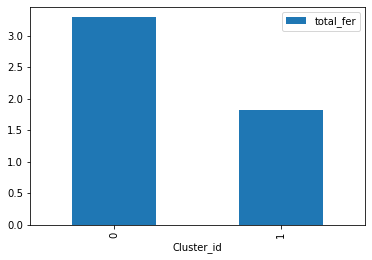

In [83]:
df2[['total_fer','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

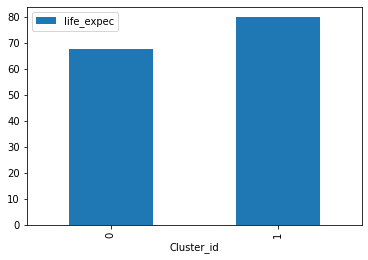

In [84]:
df2[['life_expec','Cluster_id']].groupby(['Cluster_id']).mean().plot(kind='bar')
plt.show()

**Comparing the results from kmeans clustering and Hierarchical clustering**
- `Kmeans` - It gives a list of countries which are well developed and can be ignored by the NGO and also gives the list of countries which are economically very poor compared to other 2 clusters and are in dire need of aid. And finally cluster 1 countries which can be taken care after the NGO is done with cluster 0.
- `Heirarchical` - We could get only 2 clusters from heirarchical clustering and so the result is not as precise as the result obtained from kmeans clustering. Cluster 1 has 128 countries and the mean of gdp and income is very high, while still it consisits some countries which have low gdp per capita and income.
